# Project 1 - Group 6
###### <font color='gray'>Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang</font>

In [1]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline

In [2]:
## Import datasets ##

# Aisha's datasets: Rotten Tomatoes
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin1')

# Adonis's dataset: Box Office Mojo
df_gross = pd.read_csv("data/bom.movie_gross.csv.gz")

# Angela's dataset: The Numbers
mb = pd.read_csv('data/tn.movie_budgets.csv.gz')

# Deja's dataset: TMDB
movie_type = pd.read_csv('data/tmdb.movies.csv.gz')

# James's datasets: IMDB
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

----

## Angela's Data Analysis:

In [3]:
## Preliminary analysis
mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
## Check datatypes and look for any missing values
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Observations and Insights:**
<ul>
<li>There are 5782 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.
</ul>

In [5]:
## Change release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Change production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])


## Check that all changes have been correctly made
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [6]:
## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

mb.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347


In [7]:
mb.tail(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5717,18,2010-11-12,Tiny Furniture,50000,391674,424149
5719,20,2015-07-31,Counting,50000,8374,8374
5721,22,2014-02-14,Down and Dangerous,50000,0,0
5723,24,2015-08-04,Bending Steel,50000,0,0
5724,25,2015-09-01,"Run, Hide, Die",50000,0,0
5725,26,2014-12-31,The Image Revolution,50000,0,0
5726,27,2013-10-25,A True Story,45000,0,0
5728,29,2013-06-21,This Is Martin Bonner,42000,0,0
5730,31,2010-03-12,The Exploding Girl,40000,25572,25572
5731,32,2011-02-11,Raymond Did It,40000,3632,3632


**Observations & Insights:**
<ul>
<li>There are a lot of gross values that are 0. They also tend to correlate with movies with very small production budgets.
<li>Upon investigation, these films are usually independently made and don't apply to a large corporation like Microsoft.
</ul>

In [8]:
## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])
mb.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209,-70975705,355945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923,-99925825,579620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,173139099,809439099
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,-61232488,118151347


**Observations & Insights:**
<ul>
<li>There are films that are box office bombs such as Dark Phoenix, The Lone Ranger, and Pirates of the Caribbean: On Strangers Tides. Their production budgets overshadowed their box office revenues.
</ul>

In [9]:
## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.reset_index(inplace=True)

## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.reset_index(inplace=True)

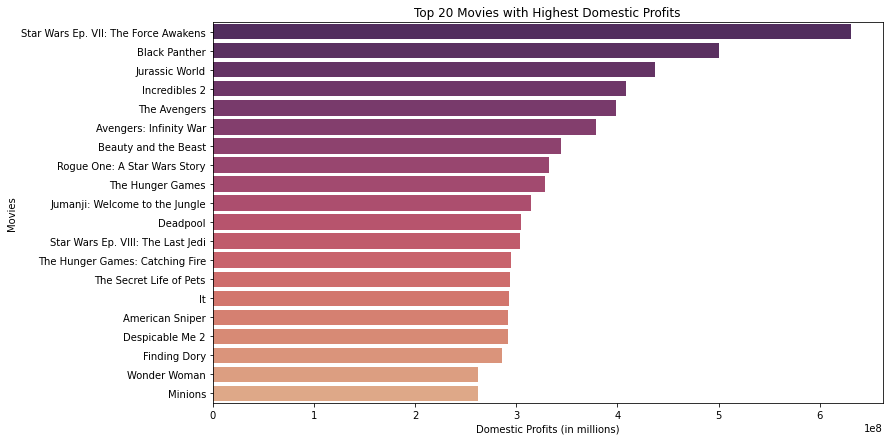

In [10]:
## Bar chart of Top 30 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x1 = mb_dp['movie'][0:30]
y1 = mb_dp['domestic_profit'][0:30]


# Buena Vista is MAGENTA
# Universal Pictures is VIOLET
ax = sns.barplot(x=y1, y=x1,
                 palette=["#cc0099"
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Black Panther'
                          or x=='Incredibles 2'
                          or x=='The Avengers'
                          or x=='Avengers: Infinity War'
                          or x=='Beauty and the Beast'
                          or x=='Rogue One: A Star Wars Story'
                          or x=='Deadpool'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='The Secret Life of Pets'
                          or x=='Finding Dory'
                          or x=='Captain Marvel'
                          or x=='Frozen'
                          or x=='Toy Story 3'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          else '#3333cc'
                          if x=='Jurassic World'
                          or x=='Furious 7'
                          or x=='Jurassic World: Fallen Kingdom'
                          or x=='Minions'
                          or x=='Despicable Me 2'
                          else '#e0e0eb' for x in mb_dp['movie']])

ax.set_xlabel('Domestic Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Domestic Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,100000000,200000000,300000000,400000000,500000000,600000000],
           labels=['0','100M', '200M', '300M', '400M', '500M', '600M'], fontsize=12)
plt.yticks(fontsize=10)

bv_label = mpatches.Patch(color='#cc0099', label='Buena Vista')
up_label = mpatches.Patch(color='#3333cc', label='Universal Pictures')
other_label = mpatches.Patch(color='#e0e0eb', label='Other Studios')
ax.legend(handles=[bv_label, up_label, other_label], loc='center right', prop={'size':16});

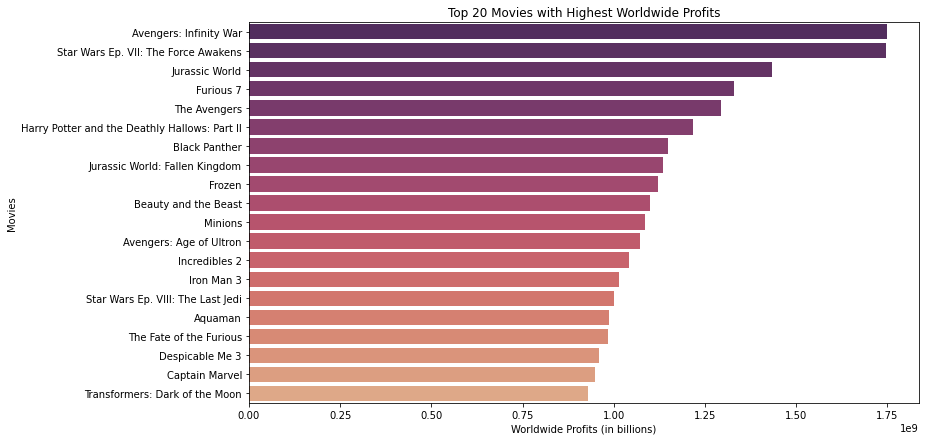

In [11]:
## Bar chart of Top 30 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x2 = mb_wp['movie'][0:30]
y2 = mb_wp['worldwide_profit'][0:30]


# Buena Vista is MAGENTA
# Universal Pictures is VIOLET
ax = sns.barplot(x=y2, y=x2,
                 palette=["#cc0099"
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Black Panther'
                          or x=='Incredibles 2'
                          or x=='The Avengers'
                          or x=='Avengers: Infinity War'
                          or x=='Beauty and the Beast'
                          or x=='Rogue One: A Star Wars Story'
                          or x=='Deadpool'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='The Secret Life of Pets'
                          or x=='Finding Dory'
                          or x=='Captain Marvel'
                          or x=='Frozen'
                          or x=='Toy Story 3'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          or x=='Frozen'
                          or x=='Beauty and the Beast'
                          or x=='Stars Wars Ep. VIII: The Last Jedi'
                          or x=='Captain Marvel'
                          or x=='Zootopia'
                          or x=='Avengers: Age of Ultron'
                          or x=='Captain America: Civil War'
                          else '#3333cc'
                          if x=='Jurassic World'
                          or x=='Furious 7'
                          or x=='Jurassic World: Fallen Kingdom'
                          or x=='Minions'
                          or x=='Despicable Me 2'
                          or x=='The Fate of the Furious'
                          or x=='Despicable Me 3'
                          else '#e0e0eb' for x in mb_wp['movie']])

ax.set_xlabel('Worldwide Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Worldwide Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,0.25e9,0.5e9,0.75e9,1e9,1.25e9,1.5e9,1.75e9],
           labels=['0', '0.25B', '0.5B', '0.75B', '1B', '1.25B', '1.5B', '1.75B'], fontsize=12)
plt.yticks(fontsize=10)

bv_label = mpatches.Patch(color='#cc0099', label='Buena Vista')
up_label = mpatches.Patch(color='#3333cc', label='Universal Pictures')
other_label = mpatches.Patch(color='#e0e0eb', label='Other Studios')
ax.legend(handles=[bv_label, up_label, other_label], loc='center right', prop={'size':16});

**Final Observations & Insights:**
<ul>
    <li>The 10 movies with highest domestic profits from 2010-mid2019 are <b><i>Star Wars Ep. VII: The Force Awakens, Black Panther, Jurassic World, Incredibles 2, The Avengers, Avengers: Infinity War, Beauty and the Beast, Rogue One: A Star Wars Story, The Hunger Games, and Jumanji: Welcome to the Jungle.</i></b>
    <li>The 10 movies with highest worldwide profits from 2010-mid2019 are <b><i>Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part II, Black Panther, Jurassic World: Fallen Kingdom, Frozen, and Beauty and the Beast.</i></b>
    <li>The most frequently occuring genres of the top 20 films are <b><i>Sci-fi, Action, Adventure, Animation, and Superhero.</i></b>
    <li>The majority of these films are part of the <b><i>Marvel</i></b> or <b><i>Star Wars</i></b> franchises.
    <li>There has also been a huge focus on revitalizing or reimagining classics such as <b><i>Jurassic Park, James Bond, and Jumanji.</i></b>
    <li>Many financially successful films are sequels such as <b><i>Star Wars Ep. VII, Avengers: Infinity War, Furious 7, Harry Potter and the Deathly Hallows: Parts I & II, and Incredibles 2</b></i>
</ul>

----

## Aisha's Data Analysis:

In [12]:
df_rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [13]:
df_rt_movie_info.shape

(1560, 12)

In [14]:
## Remove the month and day from the theater_date and create a new column with just the year of the release date
df_rt_movie_info['new_theater_date'] = df_rt_movie_info.theater_date.str[-4:]

In [15]:
## Convert the values in the 'new_theater_date' column from strings to integers
df_rt_movie_info['new_theater_date'] = df_rt_movie_info['new_theater_date'].apply(pd.to_numeric)

In [16]:
df_rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996.0


**Observations & Insights**
<ul>
</ul>
<li>There are 494 out of 1560 rows that have a missing studio value

In [17]:
df_rt_movie_info['studio'].isna().value_counts()

True     1066
False     494
Name: studio, dtype: int64

In [18]:
## All the studios listed
df_rt_movie_info['studio'].value_counts().head() 

Universal Pictures        35
Paramount Pictures        27
20th Century Fox          26
Sony Pictures Classics    22
Warner Bros. Pictures     21
Name: studio, dtype: int64

In [19]:
df_rt_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [20]:
df_rt_reviews[df_rt_reviews['rating'].isna()]

,id,review,rating,fresh,critic,top_critic,publisher,date
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
...,...,...,...,...,...,...,...,...
54409,2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
54417,2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [21]:
## Remove all rows that have a null value in the 'rating' column
df_rt_reviews = df_rt_reviews[df_rt_reviews['rating'].notna()]
df_rt_reviews.shape

(40915, 8)

In [22]:
df_rt_reviews.loc[df_rt_reviews ['rating'] == 'T']

,id,review,rating,fresh,critic,top_critic,publisher,date
47013,1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"January 1, 2000"


In [23]:
## Split the "rating" column into two separate columns, separating them on "/" if the rating is not a letter
df_rt_reviews[['fn','sn']] = df_rt_reviews['rating'].str.split('/',expand=True)

In [24]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",C,None
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2,5
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",B-,None
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2,4


In [25]:
## Replace the null values in the 'sn'(second number) with number 1. The row of the column 'sn' has a null value 
# only if the corresponding 'rating' column has a letter rating.
df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)

In [26]:
## Replace the letter ratings with the appropriate percentages
# The letter ratings are: A+, A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F+, F, F-
# A+ gets 1, A gets 93.34, A- gets 86.68
# B+ gets 80.02, B gets 73.36, B- gets 66.7, 
# C+ gets 60.04, C gets 53.38, C- gets 46.72
# D+ gets 40.06, D gets 33.4, D- gets 26.74
# F+ gets 20.08, F gets 13.42, F- gets 6.66
df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])

In [27]:
## Delete a row with an outlier value in the 'fn' column which is giving an error 
# when trying to convert all string values into numeric values
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'N']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'R']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '1-5']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'T']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '3 1']

In [28]:
## Convert all string values in the 'fn' and 'sn' columns into numeric values
df_rt_reviews['fn'] = df_rt_reviews['fn'].apply(pd.to_numeric)
df_rt_reviews['sn'] = df_rt_reviews['sn'].apply(pd.to_numeric)

In [29]:
df_rt_reviews['new_rating'] = df_rt_reviews.apply(lambda row: row.fn/row.sn, axis=1)

In [30]:
## Delete rows that have a new_rating value higher than 1
df_rt_reviews = df_rt_reviews[df_rt_reviews.new_rating <=1]

In [31]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn,new_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0000,5,0.6000
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",0.5338,1,0.5338
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0000,5,0.4000
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",0.6670,1,0.6670
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0000,4,0.5000


In [32]:
## Create a new dataset with only 'id' and 'new_rating' columns of the 'df_rt_reviews' dataset
# so we can merge it later on with the 'df_rt_movie_info' dataset.
new_rt_reviews = pd.DataFrame(zip(df_rt_reviews.id, df_rt_reviews.new_rating))

In [33]:
## Rename the columns back to original names
new_rt_reviews.rename(columns={0: 'id', 1: 'rating'}, inplace=True)

In [34]:
new_rt_reviews.head()

,id,rating
0,3,0.6000
1,3,0.5338
2,3,0.4000
3,3,0.6670
4,3,0.5000


In [35]:
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,1994.0
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN


In [36]:
new_rt_movie_info = pd.DataFrame(zip(df_rt_movie_info.id, df_rt_movie_info.genre,df_rt_movie_info.runtime,df_rt_movie_info.new_theater_date))

In [37]:
new_rt_movie_info.head()

,0,1,2,3
0,1,Action and Adventure|Classics|Drama,104 minutes,1971.0
1,3,Drama|Science Fiction and Fantasy,108 minutes,2012.0
2,5,Drama|Musical and Performing Arts,116 minutes,1996.0
3,6,Drama|Mystery and Suspense,128 minutes,1994.0
4,7,Drama|Romance,200 minutes,NaN


In [38]:
# Rename the columns back to original names
new_rt_movie_info.rename(columns={0: 'id', 1: 'genres',2: 'runtime',3:'release_year'}, inplace=True)

In [39]:
new_rt_movie_info.head()

,id,genres,runtime,release_year
0,1,Action and Adventure|Classics|Drama,104 minutes,1971.0
1,3,Drama|Science Fiction and Fantasy,108 minutes,2012.0
2,5,Drama|Musical and Performing Arts,116 minutes,1996.0
3,6,Drama|Mystery and Suspense,128 minutes,1994.0
4,7,Drama|Romance,200 minutes,NaN


In [40]:
# Left join the new_rt_movie_info to new_rt_reviews
merged_datasets = pd.merge(new_rt_reviews,new_rt_movie_info,on='id',how='left')

In [41]:
merged_datasets.head()

,id,rating,genres,runtime,release_year
0,3,0.6000,Drama|Science Fiction and Fantasy,108 minutes,2012.0
1,3,0.5338,Drama|Science Fiction and Fantasy,108 minutes,2012.0
2,3,0.4000,Drama|Science Fiction and Fantasy,108 minutes,2012.0
3,3,0.6670,Drama|Science Fiction and Fantasy,108 minutes,2012.0
4,3,0.5000,Drama|Science Fiction and Fantasy,108 minutes,2012.0


In [42]:
## First step in splitting the genres of each row into separate rows for each genre of each movie
## Create a list out of each genres string such as this: 'Action and Adventure|Classics|Drama'
merged_datasets['genres']=merged_datasets['genres'].str.split('|')

## Second step in splitting the genres of each row into separate rows for each genre of each movie
merged_datasets = merged_datasets.explode('genres')

# Get rid of text characters in the 'runtime' column 
merged_datasets['runtime'] = merged_datasets['runtime'].str.replace(' minutes','')

# Convert the 'runtime' column's string values into floats
merged_datasets['runtime'] = pd.to_numeric(merged_datasets['runtime'])

merged_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88969 entries, 0 to 40284
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            88969 non-null  int64  
 1   rating        88969 non-null  float64
 2   genres        88896 non-null  object 
 3   runtime       87648 non-null  float64
 4   release_year  87190 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.1+ MB


In [43]:
## Explore movie genre trends over the years

merged_datasets['genres'].value_counts()
merged_datasets = merged_datasets[merged_datasets['release_year']>1999]
merged_datasets['release_year'].value_counts()
merged_datasets_drama = merged_datasets[merged_datasets['genres']=='Drama']
merged_datasets_comedy = merged_datasets[merged_datasets['genres']=='Comedy']
merged_datasets_action_adv= merged_datasets[merged_datasets['genres']=='Action and Adventure']
merged_datasets_animation= merged_datasets[merged_datasets['genres']=='Animation']
merged_datasets_romance= merged_datasets[merged_datasets['genres']=='Romance']

In [44]:
## Make separate dataframes by value counts in each genre

df_drama = merged_datasets_drama.groupby('release_year')['genres'].value_counts()
df_comedy = merged_datasets_comedy.groupby('release_year')['genres'].value_counts()
df_action_adv = merged_datasets_action_adv.groupby('release_year')['genres'].value_counts()
df_animation = merged_datasets_animation.groupby('release_year')['genres'].value_counts()
df_romance = merged_datasets_romance.groupby('release_year')['genres'].value_counts()

In [45]:
## Convert dataframes to lists

mylist_drama = df_drama.to_list()
mylist_comedy = df_comedy.to_list()
mylist_action_adv = df_action_adv.to_list()
mylist_action_adv = [528,241,504,385,598,916,607,534,566,451,435,501,516,25,0,112,131,11,366]
mylist_animation = df_animation.to_list()
mylist_animation = [85, 76, 99, 53, 160, 66, 71, 129, 189, 164, 16, 213,0,0,0, 48, 234, 39, 92]
mylist_romance = df_romance.to_list()
mylist_romance = [141,175,498,428,154,458,248,410,307,119,480,334,0,65,94,248,147,165,170]

In [46]:
years_list = list(range(2000,2019))

In [47]:
from matplotlib.pyplot import figure

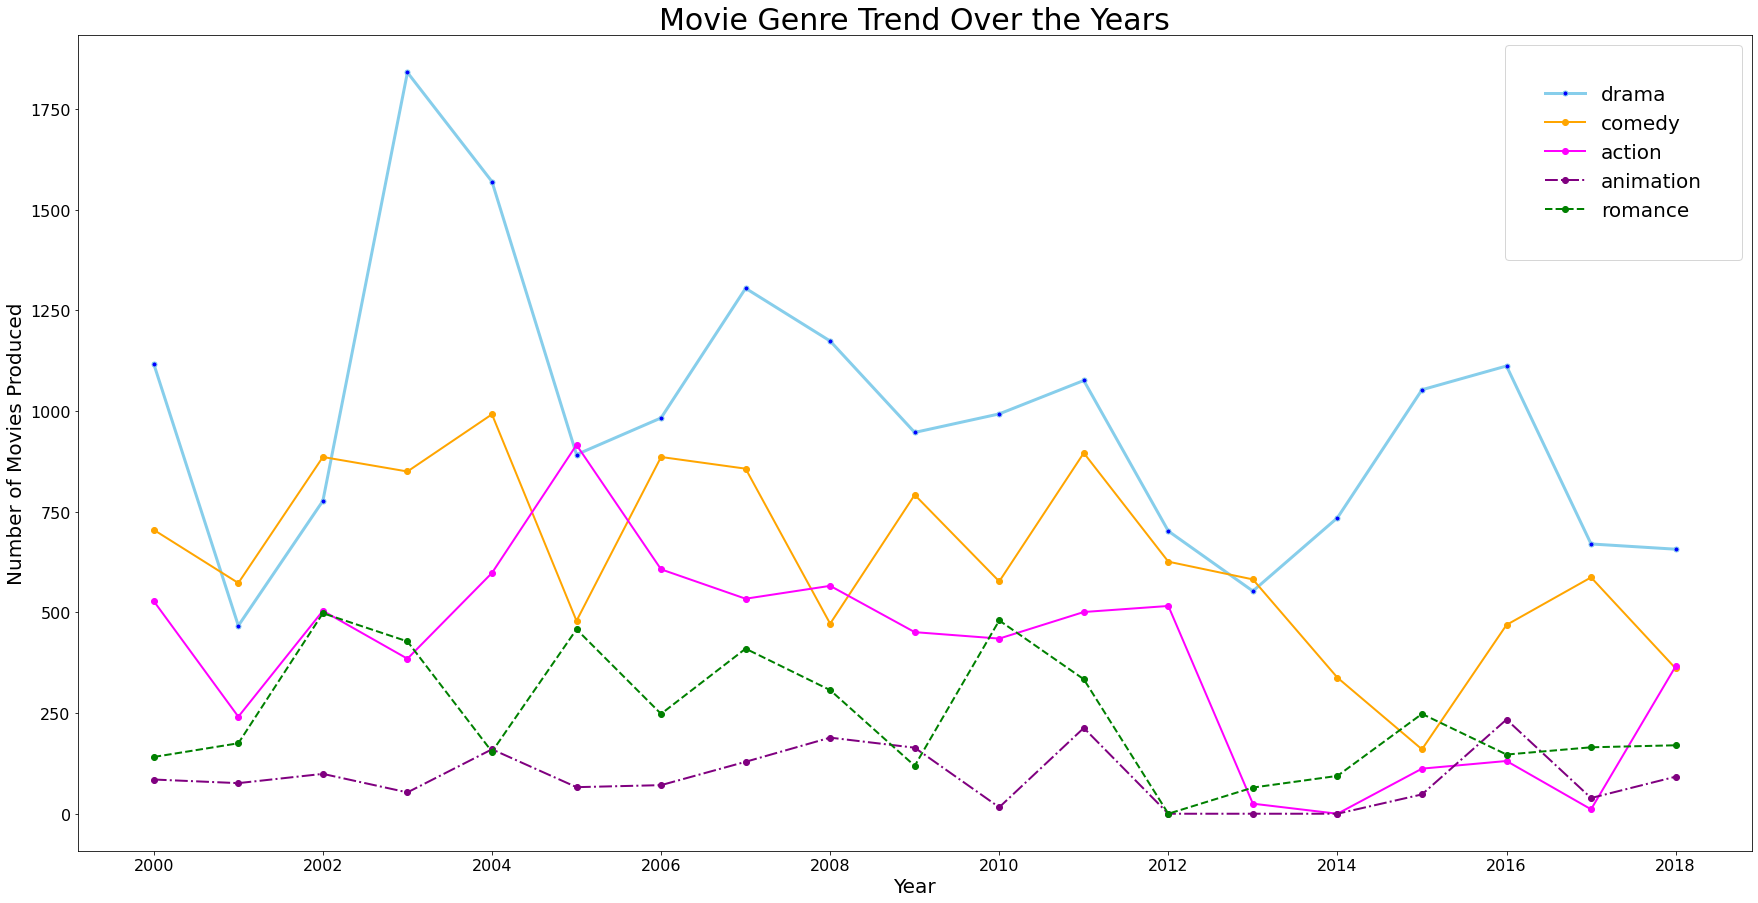

In [48]:
## Plot
plt.figure(figsize=(30, 15))
plt.plot( years_list, mylist_drama, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=3,label="drama")
plt.plot( years_list, mylist_comedy, marker='o', color='orange', linewidth=2,label = 'comedy')
plt.plot( years_list, mylist_action_adv, marker='o', color='fuchsia', linewidth=2, linestyle='solid', label="action")
plt.plot( years_list, mylist_animation, marker='o', color='purple', linewidth=2, linestyle='dashdot', label="animation")
plt.plot( years_list, mylist_romance, marker='o', color='green', linewidth=2,linestyle='dashed', label = 'romance')
plt.legend(borderpad = 2,prop={"size":20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis="x", nbins=10)
plt.title("Movie Genre Trend Over the Years", fontsize=30)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of Movies Produced",fontsize=20);

In [49]:
merged_datasets['genres'].value_counts()

Drama                          18624
Comedy                         12088
Action and Adventure            7427
Mystery and Suspense            6439
Romance                         4641
Science Fiction and Fantasy     3722
Kids and Family                 2690
Horror                          2381
Art House and International     2250
Animation                       1734
Musical and Performing Arts     1051
Documentary                      650
Western                          578
Special Interest                 450
Sports and Fitness               257
Classics                         238
Television                       132
Faith and Spirituality           127
Anime and Manga                   18
Name: genres, dtype: int64

**Observations & Insights:**
<ul>
</ul>
<li>The last four genre categories are too low in numbers compared to other movie genres.
<li>We think it is best to remove them from our dataset.

In [50]:
## Create a list of genres that are not statistically significant
not_significant_genres_list = ['Anime and Manga','Gay and Lesbian','Cult Movies','Faith and Spirituality','Television','Sports and Fitness','Documentary','Western','Special Interest']

In [51]:
## Delete the not statistically insignificant genres from the dataset and creating a new dataset without those genres
new_merged_datasets = merged_datasets[~merged_datasets.genres.isin(not_significant_genres_list)]

In [52]:
## Find the mean of runtime for each genre
average_runtime_per_genre = new_merged_datasets.groupby('genres', as_index=False)['runtime'].mean()

## Rename the 'runtime' column into the 'mean_runtime'
average_runtime_per_genre.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

average_runtime_per_genre

,genres,mean_runtime
0,Action and Adventure,112.473344
1,Animation,94.171280
2,Art House and International,111.512444
3,Classics,176.436975
4,Comedy,102.869470
5,Drama,113.574733
6,Horror,101.153846
7,Kids and Family,100.543093
8,Musical and Performing Arts,110.934348
9,Mystery and Suspense,111.593186


In [53]:
# Find the mean of the ratings for each genre
average_rating_per_genre = new_merged_datasets.groupby('genres', as_index=False)['rating'].mean()

## Rename the "rating" column into the 'mean_rating'
average_rating_per_genre.rename(columns={'rating': 'mean_rating'}, inplace=True)

average_rating_per_genre

,genres,mean_rating
0,Action and Adventure,0.610588
1,Animation,0.636965
2,Art House and International,0.690348
3,Classics,0.600697
4,Comedy,0.610432
5,Drama,0.652974
6,Horror,0.535693
7,Kids and Family,0.620816
8,Musical and Performing Arts,0.616709
9,Mystery and Suspense,0.620616


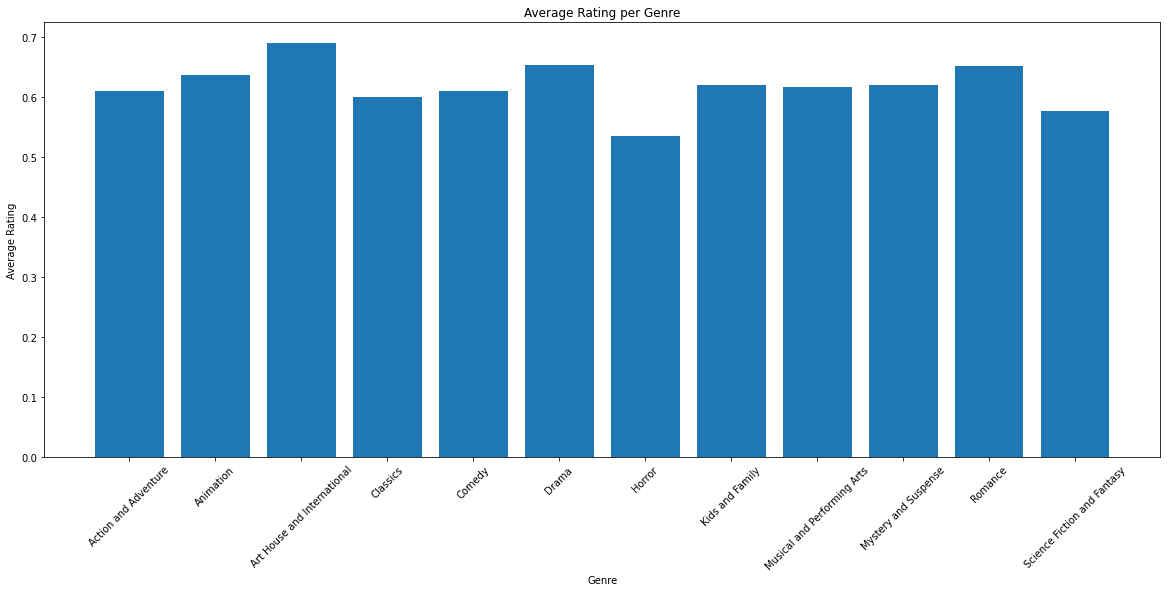

In [54]:
## Plot
fig, ax1 = plt.subplots(figsize = (20,8))
x1 = average_rating_per_genre['genres']
y1 = average_rating_per_genre['mean_rating']
ax1.bar(x1,y1)
ax1.set_title('Average Rating per Genre')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Rating')
plt.xticks(rotation = 45);

**Observations & Insights:**
<ul>
</ul>
The 4 genres that have the highest average ratings:
        <li> Romance </li>
        <li> Art House and International </li>
        <li> Drama </li>
        <li> Mystery and Suspense </li>

In [55]:
# Create a list of the four genres with the highest rating
four_genres_list = ['Romance','Art House and International','Drama','Mystery and Suspense']

# Create a dataset with only the four genres with the highest ratings
highest_rating_genres_dataset = merged_datasets[merged_datasets.genres.isin(four_genres_list)]

highest_rating_genres_dataset['genres'].value_counts()

Drama                          18624
Mystery and Suspense            6439
Romance                         4641
Art House and International     2250
Name: genres, dtype: int64

In [56]:
# The mean of runtime for the four highest rated genres
highest_rating_genres_dataset['runtime'].mean()

# Standard deviation from the mean for the four highest rated genres
highest_rating_genres_dataset['runtime'].std()

# Average runtime for each of the four highest rating genres
avg_runtime_high_rating_genres = highest_rating_genres_dataset.groupby('genres', as_index=False)['runtime'].mean()

# Rename the 'runtime' column of the new dataset into the "mean_runtime" 
avg_runtime_high_rating_genres.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

avg_runtime_high_rating_genres

,genres,mean_runtime
0,Art House and International,111.512444
1,Drama,113.574733
2,Mystery and Suspense,111.593186
3,Romance,112.731308


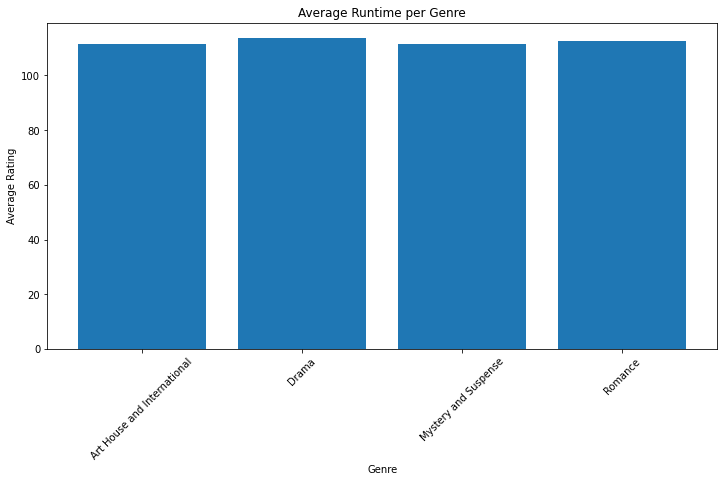

In [57]:
## Plot
fig, ax2 = plt.subplots(figsize = (12,6))
x2 = avg_runtime_high_rating_genres['genres']
y2 = avg_runtime_high_rating_genres['mean_runtime']
ax2.bar(x2,y2)
ax2.set_title('Average Runtime per Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Average Rating')
plt.xticks(rotation = 45);

----

## Adonis's Data Analysis

In [58]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [59]:
## Find null values
df_gross['domestic_gross'].isnull().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [60]:
df_gross['foreign_gross'].isnull().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [61]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [62]:
## Remove commas from values & convert to numeric
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'])
df_gross['foreign_gross'].head() 

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [63]:
## Remove null values from columns
df_gross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
df_gross.shape

(2007, 5)

In [64]:
## Verification of null value deletion
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


**Observations & Insights:**
<ul></ul>
<li>Do the studios that produce the most movies have the highest gross values?

In [65]:
## Top 10 studios with the most movies
df_gross['studio'].value_counts()[:10]

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: studio, dtype: int64

In [66]:
x = list(df_gross['studio'].value_counts()[:10].index)
x

['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']

In [67]:
## Top 10 studios domestic gross
dfm2 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)
d = dfm2[dfm2['studio'].isin(x)]

**Observations & Insights:**
<ul></ul>
<li>Data analysis will focus on domestic and foreign gross for titles and studios.

In [68]:
## Total gross for each film
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [69]:
## Sort by domestic gross
f = df_gross.sort_values(by='domestic_gross', ascending=False)

f.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09


**Observations & Insights:**
<ul></ul>
<li>Some foreign gross values seem wrong for blockbuster films. Are there more?

In [70]:
## Sort df on foreign gross
g = df_gross.sort_values(by='foreign_gross', ascending=False)
g.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [71]:
## Check for more misreported foreign gross
g.tail(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
187,"Waiting for ""Superman""",ParV,6400000.0,9300.0,2010,6409300.0
2696,Troublemakers: The Story of Land Art,FRun,29500.0,9100.0,2016,38600.0
300,Saint John of Las Vegas,IVP,103000.0,9100.0,2010,112100.0
279,Karthik Calling Karthik,Eros,286000.0,7100.0,2010,293100.0
305,Enemies of the People,ICir,73200.0,6400.0,2010,79600.0
320,Nenette,Kino,18000.0,5400.0,2010,23400.0
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0
317,Bluebeard,Strand,33500.0,5200.0,2010,38700.0
715,Aurora,CGld,5700.0,5100.0,2011,10800.0
266,The Extra Man,Magn.,453000.0,4500.0,2010,457500.0


**Observations & Insights:**
<ul></ul>
<li>Foreign gross values for some blockbusters are obviously misreported.
<li>Analysis will focus on domestic markets, as foreign gross values cannot be verified/trusted.

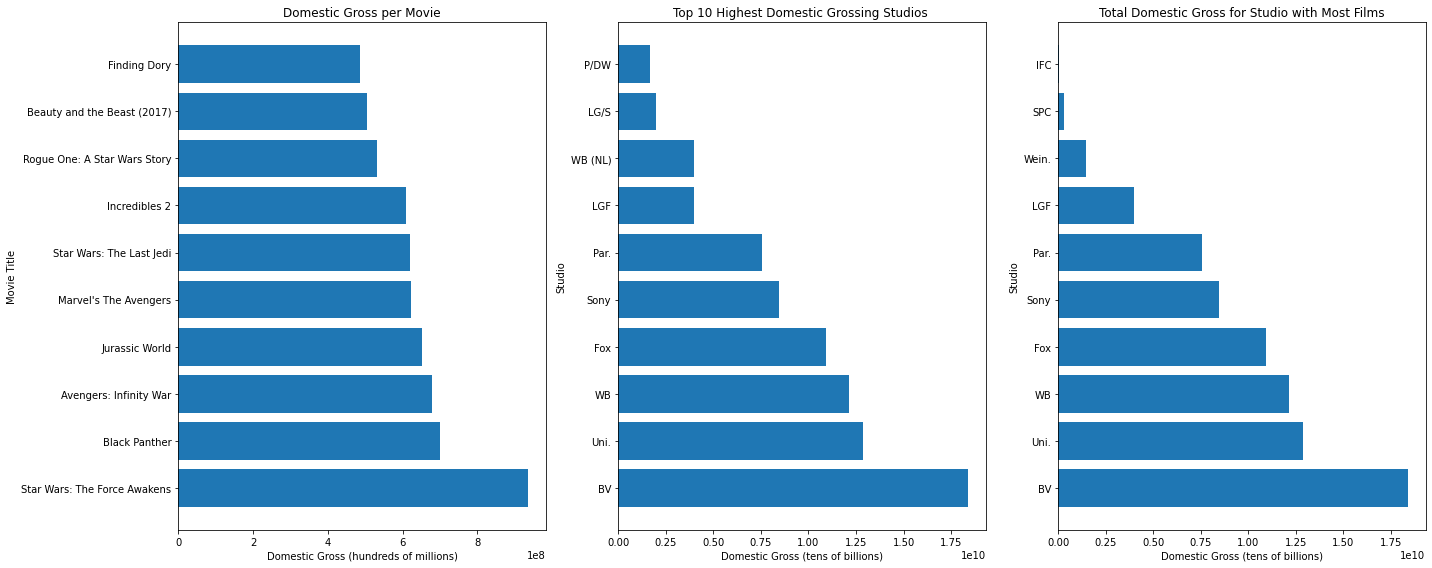

In [72]:
## Plots

# Domestic gross per title
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

x1 = f['title'][:10]
y1 = f['domestic_gross'][:10]
ax1.barh(x1, y1)
ax1.set_xlabel("Domestic Gross (hundreds of millions)")
ax1.set_ylabel("Movie Title")
ax1.set_title("Domestic Gross per Movie")


# Domestic gross per studio
dfm3 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)


x2 = dfm3.studio[:10]
y2 = dfm3.domestic_gross[:10]
ax2.barh(x2, y2)
ax2.set_xlabel('Domestic Gross (tens of billions)')
ax2.set_ylabel('Studio')
ax2.set_title('Top 10 Highest Domestic Grossing Studios ')

# Domestic gross for studios with most films
x = ['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']


x3 = d['studio']
y3 = d['domestic_gross']
ax3.barh(x3, y3)
ax3.set_xlabel("Domestic Gross (tens of billions)")
ax3.set_ylabel("Studio")
ax3.set_title('Total Domestic Gross for Studio with Most Films')

fig.tight_layout()

### Insight: Most of these studios are subsidiaries of a parent company. Should Microsoft simply acquire studios for it's content production?

In [ ]:
#List of unique studios. Used to create sample list for parent companies
df_gross['studio'].unique()

In [ ]:
#Sample list of studios owned by parent companies
Disney = ['BV', 'Fox', 'FoxS', 'W/Dim.']
Comcast = ['Uni', 'P/DW', 'Focus']
TimeWarner = ['WB', 'WB (NL)']
Viacom = ['CBS', 'P/DW', 'Mira', 'ParV']
Sony = ['SPC', 'Sony', 'TriS']
MiniMajors = ['RAtt.', 'Rela.']

In [ ]:
#simplified DFs to calculate total domestic gross from studios
Disney_df = dfm2[dfm2['studio'].isin(Disney)]
Comcast_df = dfm2[dfm2['studio'].isin(Comcast)]
TimeWarner_df = dfm2[dfm2['studio'].isin(TimeWarner)]
Viacom_df = dfm2[dfm2['studio'].isin(Viacom)]
Sony_df = dfm2[dfm2['studio'].isin(Sony)]
Mini_df = dfm2[dfm2['studio'].isin(MiniMajors)]

In [ ]:
#plot of total domestic gross per parent company(hard coded)
fig, ax = plt.subplots()

n = ['Disney', 'TimeWarner', 'Sony', 'Comcast', 'Viacom', 'MiniMajors']
m = [Disney_df['domestic_gross'].sum(), TimeWarner_df['domestic_gross'].sum(), Sony_df['domestic_gross'].sum(), Comcast_df['domestic_gross'].sum(),  
     Viacom_df['domestic_gross'].sum(),  Mini_df['domestic_gross'].sum()]

plt.bar(n, m)
ax.set_xlabel("Parent Company")
ax.set_ylabel("Total Subsidiary Gross")
ax.set_title("Total Domestic Gross for Parent Companies")

**Final Observations & Insights**
<ul>
    <li> Owning multiple studios that produce content yields incredible profits domestically. Microsoft should seek to acquire multiple production studios to create varied content.
    <li> The highest grossing films are all franchises (Marvel, Jurassic Park, Star Wars, etc). It is highly recommended that any action films made be based upon Microsoft franchises to avoid licensure/copyright fees.
</ul>

----

## Deja's Data Analysis

In [73]:
# Display dataframe
display(movie_type)
display(movie_type.info())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

**Observations & Insights:**
<ul></ul>
<li>There are 26517 total entries with 0 missing values.
<li>The vote count needs to be reduced to a more relevant number and discard outliers like 1.
<li>Genre IDs need to be translated into genre names.
<li>There are lots of foreign films, and we are currently only interested in English-language films.
<li>There are duplicate titles.

In [74]:
# Show when movies were released
movie_type.sort_values(by='release_date', ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26057,26057,"[27, 80, 80, 80, 80, 80, 80]",570704,en,Murdery Christmas,0.840,2020-12-25,Murdery Christmas,0.0,1
24265,24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4
24892,24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24819,24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24297,24297,[18],415085,en,All Creatures Here Below,8.316,2019-05-17,All Creatures Here Below,5.0,5
...,...,...,...,...,...,...,...,...,...,...
11192,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243
26345,26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3
3580,3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3
21758,21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23


In [75]:
# Filter for movies in English
movie_type= movie_type.loc[movie_type['original_language'] == "en"]
movie_type

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [76]:
# Condense data to get most voted on movies
movie_type_data= movie_type.loc[movie_type['vote_count'] >= 10000]
movie_type_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
...,...,...,...,...,...,...,...,...,...,...
20729,20729,"[27, 53]",346364,en,It,13.966,2017-09-08,It,7.2,10931
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
23817,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365
23819,23819,"[28, 12, 35, 14]",284053,en,Thor: Ragnarok,43.450,2017-11-03,Thor: Ragnarok,7.5,11380


In [77]:
movie_type_data["genre_ids"].iloc[0]

'[12, 14, 10751]'

In [78]:
## Separate genre ids with multiple values
movie_type_data.genre_ids = movie_type_data.genre_ids.map(lambda x:eval(x))

/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [79]:
movie_type_data = movie_type_data.explode("genre_ids")

In [80]:
## Filter out genres with few votes
movie_type_data= movie_type_data.loc[movie_type_data['genre_ids'] <= 878]
movie_type_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
2,2,12,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
2,2,28,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
2,2,878,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
...,...,...,...,...,...,...,...,...,...,...
23819,23819,12,284053,en,Thor: Ragnarok,43.450,2017-11-03,Thor: Ragnarok,7.5,11380
23819,23819,35,284053,en,Thor: Ragnarok,43.450,2017-11-03,Thor: Ragnarok,7.5,11380
23819,23819,14,284053,en,Thor: Ragnarok,43.450,2017-11-03,Thor: Ragnarok,7.5,11380
24005,24005,27,346364,en,It,13.966,2017-09-08,It,7.2,10931


In [81]:
movie_type_data["genre_ids"].replace({12: "adventure", 14: "fantasy", 16: "animated", 18: "drama", 27: "horror", 28: "action", 35: "comedy", 36: "history", 37: "western", 53: "thriller", 80: "crime", 878: "sci fi"}, inplace=True)

/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


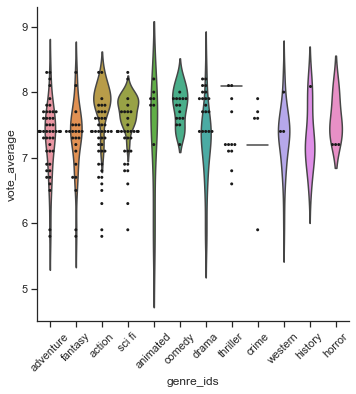

In [82]:
## Create a violin plot to display the relationship between vote averages and genres
sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x=movie_type_data["genre_ids"].astype("category") , y="vote_average", kind="violin", inner=None, data=movie_type_data)
sns.swarmplot(x="genre_ids", y="vote_average", color="k", size=3, data=movie_type_data, ax=g.ax)
g.set_xticklabels(rotation=45);

**Final Observations & Insights:**
<ul></ul>
<li>Focus of resources should be towards action, adventure, fantasy, sci-fi, comedy and animated movies.
<li>While animated has the highest rating, the other 5 categories have higher volumes of consumer interaction.

----

## James's Data Analysis:

In [83]:
#display dataframe
display(title_ratings)
display(title_basics)
display(title_akas)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [84]:
## Set tconst as index for joining 3 separate dataframes
title_ratings.set_index('tconst', inplace = True)
title_basics.set_index('tconst', inplace =True)

## Rename title_id to tconst to join this data frame into our main data frame
title_akas.rename(columns={'title_id':'tconst'}, inplace=True)
title_akas.set_index('tconst', inplace=True)

## Complete first join between title_ratings and title_basics
merged1 = title_ratings.join(title_basics, on='tconst', how='inner')

## Complete second join between the above result and title_akas
imdb_data = merged1.join(title_akas, on='tconst', how='inner')

## Since there are lots of missing data and irrelevant data, the data is filtered with only US region
imdb_US_movie = imdb_data[imdb_data['region'] == 'US'].copy()

## Sort in descending order
imdb_US_movie = imdb_US_movie.sort_values(by=['numvotes'], ascending=False).copy()

## Drop all duplicate titles from the dataframe
imdb_US_movie = imdb_US_movie.drop_duplicates(subset=['original_title'], keep ='first').copy()

## Filter out irrelevant columns in our dataframe
## Set the index to title
imdb_US_movie = imdb_US_movie.set_index('primary_title').copy()
imdb_US_movie = imdb_US_movie[['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'genres']].copy()
imdb_US_movie.head()

,averagerating,numvotes,start_year,runtime_minutes,genres
primary_title,,,,,
Inception,8.8,1841066,2010,148.0,"Action,Adventure,Sci-Fi"
The Dark Knight Rises,8.4,1387769,2012,164.0,"Action,Thriller"
Interstellar,8.6,1299334,2014,169.0,"Adventure,Drama,Sci-Fi"
Django Unchained,8.4,1211405,2012,165.0,"Drama,Western"
The Avengers,8.1,1183655,2012,143.0,"Action,Adventure,Sci-Fi"


In [85]:
mean = imdb_US_movie['numvotes'].mean()
median = imdb_US_movie['numvotes'].median()
print(f'mean is {mean} and median is {median}')

mean is 8626.783681653427 and median is 67.0


**Observations & Insights:**
<ul></ul>
<li>The mean vote counts is significantly larger than the median. This means the data is extremely skewed right.
<li>Therefore we will use the upper quantiles of this data since movies with lower ratings are not significant in our analysis

In [86]:
## We will consider top 10 and top 1 percent of the data by vote counts
ten_percentile = imdb_US_movie['numvotes'].quantile(.90)
one_percentile = imdb_US_movie['numvotes'].quantile(.99)

print("top 10 percentile:", round(ten_percentile))
print("top 1 percentile:", round(one_percentile))

top 10 percentile: 5795.0
top 1 percentile: 223993.0


In [87]:
## Movies filtered based on the top 10 percentile of vote counts
top_10_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=5795)].reset_index().copy()

## Divide up multiple genres for a single movie into a separate row
top_10_percent.loc[:,('genres')] = top_10_percent.loc[:,('genres')].str.split(',')
top_10 = top_10_percent.explode('genres')

## Filter out top 5 genres of movie counts within the 10 percentile
genres_count_10_percent = pd.DataFrame(top_10['genres'].value_counts())
genres_count_10_percent = genres_count_10_percent.head()

## Create a table with average number of votes for top five movie genre counts
genres_avgvotes_10 = pd.DataFrame(top_10.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_10 = genres_avgvotes_10.reset_index()
genres_avgvotes_10 = genres_avgvotes_10[genres_avgvotes_10['genres'].isin(['Drama','Comedy','Action','Thriller','Adventure'])]
genres_avgvotes_10.set_index('genres', inplace=True)
genres_avgvotes_10

## Join the movie counts and average number of votes by genre
top10 = genres_count_10_percent.join(genres_avgvotes_10)
top10.rename(columns={'genres':'movie counts'}, inplace=True)
top10 = top10.reset_index().rename(columns={'index':'movie genre'})
top10

,movie genre,movie counts,numvotes
0,Drama,1356,68484.173304
1,Comedy,898,68912.766147
2,Action,694,131380.325648
3,Thriller,497,78318.523139
4,Adventure,475,169220.597895


In [88]:
## Repeat all the steps above to gather top 1 percentile of number of votes
top_1_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=223993)].reset_index().copy()
top_1_percent.loc[:,('genres')] = top_1_percent.loc[:,('genres')].str.split(',')
top_1 = top_1_percent.explode('genres')
genres_count_1percent = pd.DataFrame(top_1['genres'].value_counts())
genres_count_1 = genres_count_1percent.head()
genres_avgvotes_1 = pd.DataFrame(top_1.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_1 = genres_avgvotes_1.reset_index()
genres_avgvotes_1 = genres_avgvotes_1[genres_avgvotes_1['genres'].isin(['Drama','Comedy','Action','Sci-Fi','Adventure'])]
genres_avgvotes_1.set_index('genres', inplace=True)
top1 = genres_count_1.join(genres_avgvotes_1)
top1.rename(columns={'genres':'movie counts'}, inplace=True)
top1 = top1.reset_index().rename(columns={'index':'movie genre'})
top1

,movie genre,movie counts,numvotes
0,Action,137,420961.715328
1,Adventure,127,443631.188976
2,Drama,98,407722.265306
3,Sci-Fi,64,490730.984375
4,Comedy,59,386693.762712


In [89]:
## Style of plots used
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-notebook')

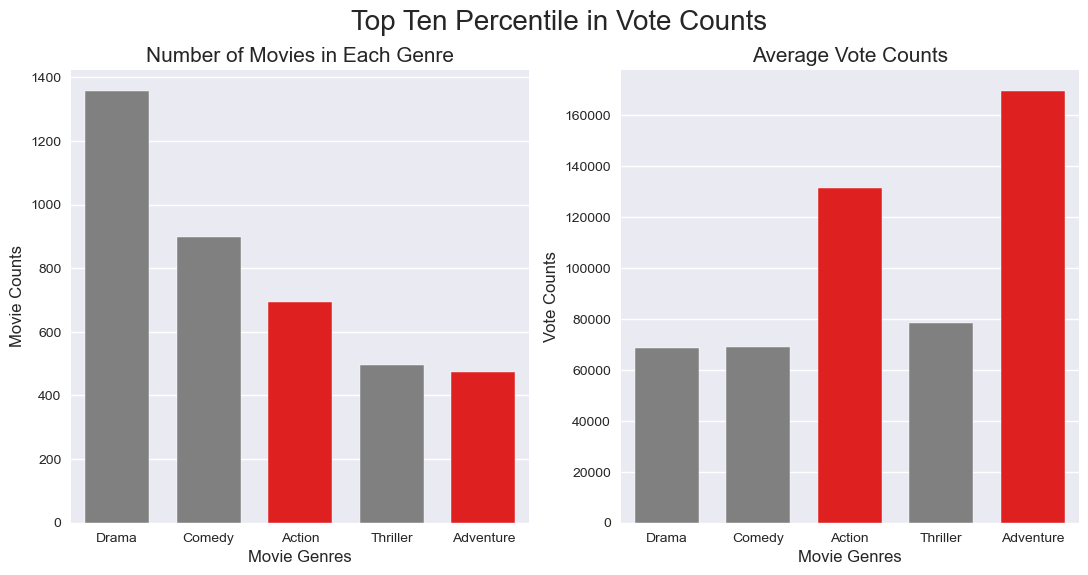

In [90]:
## Two separate bar graphs of top 1 percentile(number of votes) movie genre data

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

fig, (ax1, ax2) = plt.subplots(figsize=(13,6), ncols=2, dpi=100)

x=top10['movie genre']
y=top10['movie counts']
y1=top10['numvotes']
clrs=['grey' if (x != 'Action' and x != 'Adventure') else 'red' for x in x]

sns.barplot(x=x, y=y, palette=clrs, ax=ax1)
ax1.set_title('Number of Movies in Each Genre', fontsize=15)
ax1.set_xlabel('Movie Genres', fontsize=12)
ax1.set_ylabel('Movie Counts', fontsize=12)
change_width(ax1, 0.7)

sns.barplot(x=x, y=y1, palette=clrs, ax=ax2)
ax2.set_title('Average Vote Counts', fontsize=15)
ax2.set_xlabel('Movie Genres', fontsize=12)
ax2.set_ylabel('Vote Counts', fontsize=12);
change_width(ax2, 0.7)

fig.suptitle("Top Ten Percentile in Vote Counts", fontsize=20);

**Observations & Insights:**
<ul>
    <li> From the IMDB data we have extracted the top ten quantiles of the movie rating vote counts.
    <li> Although drama and comedy movies are more prevalent in the top ten quantiles, action and adventure movies have much higher average vote counts.
    <li> This indicates that as we move up to the higher quantile in vote counts, the number of action and adventure movies grow.
</ul>

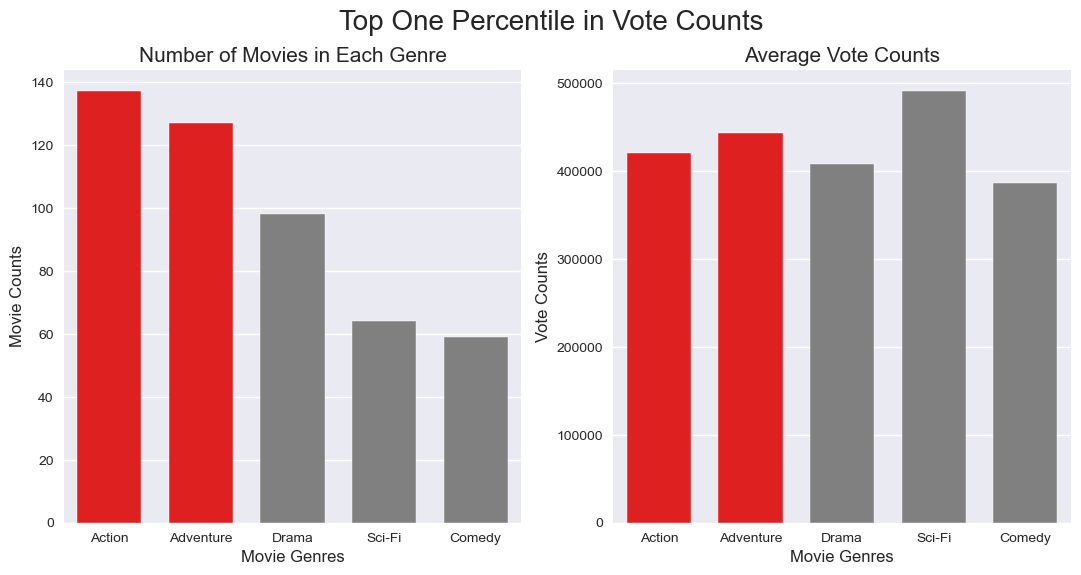

In [91]:
## Two separate bar graphs of top 1 percentile(number of votes) movie genre data

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

fig, (ax1, ax2) = plt.subplots(figsize=(13,6), ncols=2, dpi=100)

xx=top1['movie genre']
yy=top1['movie counts']
y2=top1['numvotes']
clrs=['grey' if (x != 'Action' and x != 'Adventure') else 'red' for x in top1['movie genre']]

sns.barplot(x=xx, y=yy, palette=clrs, ax=ax1)
ax1.set_title('Number of Movies in Each Genre', fontsize=15)
ax1.set_xlabel('Movie Genres', fontsize=12)
ax1.set_ylabel('Movie Counts', fontsize=12)
change_width(ax1, 0.7)

sns.barplot(x=xx, y=y2, palette=clrs, ax=ax2)
ax2.set_title('Average Vote Counts', fontsize=15)
ax2.set_xlabel('Movie Genres', fontsize=12)
ax2.set_ylabel('Vote Counts', fontsize=12);
change_width(ax2, 0.7)

fig.suptitle("Top One Percentile in Vote Counts", fontsize=20);


**Observations & Insights:**
<ul>
    <li> As seen in the previous graph, this top one quantile visualization confirms that as we move up to datas in the higher quantile, number of action and adventure movies increases.
    <li> Despite the fact that all the movies here in this data were in the top one percentile, adventure and action movies had second and third most average vote counts.